# Data Prep
### Data wrangling
+ The basic stage where we prepare the data for analysis

In [1]:
# Importing Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualization 
import seaborn as sns # for visualization 

# Importing ML modules
from sklearn.linear_model import LogisticRegression # A Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN Algorithm 

# Fearture/Target Splitting module
from sklearn.model_selection import train_test_split

# Decision Tree Visualization
from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz

# feature engineering modules
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV

# Evaluation module
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Interpretation module
import lime
import lime.lime_tabular
import eli5

# Serializing Using Jolib
import joblib

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
# The header name extracted from `hepatits.name` included in the `data directory`
headers = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY"]

# Loading dataset 
df = pd.read_csv('data/hepatitis.data', names=headers)

#### Data Overview

In [3]:
# Let's check the first 5 rows of the data
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


+ The column headers contain linespaces and irregular formatting.

In [4]:
# let's remove line space and reformat the column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [5]:
#let's check the top 5 rows to  see our changes
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [6]:
# Let's check the rows and columns of the data
df.shape

(155, 20)

+ Data contain 155 rows and 20 columns

In [7]:
# let's chect the data types of the columns in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

+ Dataset shows no null values
+ 5 out of 20 columns are numbers, the rest are of objects

In [8]:
# let's alter the '?' in the reveal null values
# Casting (?) to np.nan
df = df.replace('?', np.nan)

# Checking total missing values
missing_val = df.isnull().sum()
missing_val

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

+ The following columns with missing values includes steriod, fatigue, malaise, anorexia, liver_big, liver_firm, spleen_palpable, spiders, ascites, varices, bilirubin, alk_phosphate, sgot, albumin, and protime.

In [9]:
# let's replace missing values (np.nan) with 0
df = df.replace(np.nan, 0)

In [10]:
# let's ckeck 
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [11]:
# List of columns with object 
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [12]:
# let's check the total columns with object
sum(df.dtypes == 'object')

15

In [13]:
# Casting
# Converting the datatypes from one to another
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [14]:
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

In [15]:
# let's check the data types of the columns
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

+ Datatype converted from object to int and float
+ Dataset has 18 int and 2 float

# Exploratory Data Analysis (EDA)
+ Performing simple analysis on the data
> ##### Descriptive analytics

In [16]:
# let's check the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,155.0,1.793548,0.406070,1.0,2.00,2.0,2.0,2.0
age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.0,78.0
sex,155.0,1.103226,0.305240,1.0,1.00,1.0,1.0,2.0
steroid,155.0,1.496774,0.514393,0.0,1.00,2.0,2.0,2.0
antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.0,2.0
fatigue,155.0,1.341935,0.489350,0.0,1.00,1.0,2.0,2.0
malaise,155.0,1.593548,0.505769,0.0,1.00,2.0,2.0,2.0
anorexia,155.0,1.780645,0.430508,0.0,2.00,2.0,2.0,2.0
liver_big,155.0,1.709677,0.580727,0.0,2.00,2.0,2.0,2.0
liver_firm,155.0,1.470968,0.627401,0.0,1.00,2.0,2.0,2.0


In [17]:
# let's check the 'class' columns classification
df['class'].value_counts()

class
2    123
1     32
Name: count, dtype: int64

#### Observations
+ 1 is Die and 2 is Live
+ Hence, the dataset depict that majority of the cases are 'Live'

<Axes: xlabel='class'>

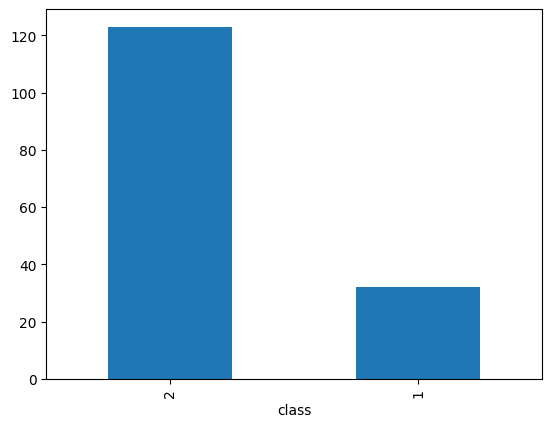

In [18]:
# let's plot the graph
df['class'].value_counts().plot(kind='bar')

In [19]:
# Let's check the Age Range
df.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

+ There is no much insight drawn
+ We will group using frequency distribution

##### Re-group Age Range using Frequency Distribution Table

In [20]:
# re-group using Frequency Distribution for more information 
labels = ['less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70 and above']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

freq_dis = df.groupby(pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)).size()

In [21]:
freq_dis

age
less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and above     2
dtype: int64

In [22]:
freq_dis = freq_dis.reset_index(name='count')

In [23]:
freq_dis

,age,count
0,less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and above,2


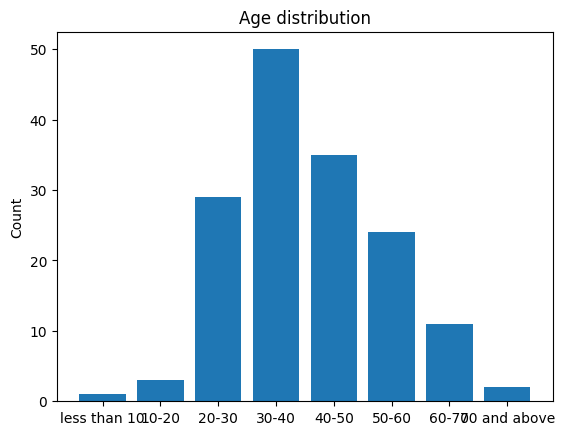

In [24]:
plt.bar(freq_dis.age, freq_dis['count'],)
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

#### OBSERVATION
+ The most infected with hepatitis is between the age 20 to 60 years
+ The highest prevalence of Hepatitis occurs between the age of 30 to 40 years

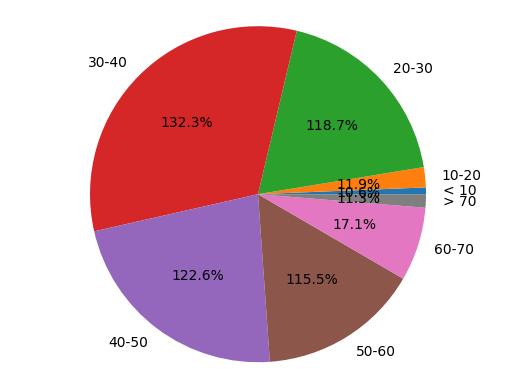

In [25]:
# Pie Chart Viz
labels = ['< 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '> 70']
fig, ax1 = plt.subplots()
ax1.pie(freq_dis['count'], labels=labels, autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

In [26]:
age_test = df[['age', 'sex', 'class']]
age_grp = age_test.groupby(['age', 'sex'], as_index=False).value_counts()
age_grp

,age,sex,class,count
0,7,1,2,1
1,20,1,2,2
2,20,2,2,1
3,22,1,2,1
4,22,2,2,1
...,...,...,...,...
75,67,2,2,1
76,69,2,2,1
77,70,1,1,1
78,72,1,2,1


### Detecting Outliers
+ Univariate Analysis
+ Multivariate Analyis

#### Methods
<p>The following listed below are the methods that can be used to detect outliers</p>

+ Boxplot 
+ Scatter 
+ Z-score 
+ Interquartile Range (IQR)

<Axes: >

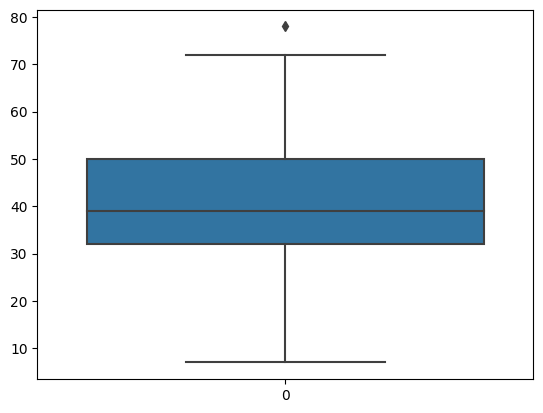

In [27]:
# Univariate outlier detection
sns.boxplot(df['age'])

+ 75 years above appears to be outlier

<Axes: >

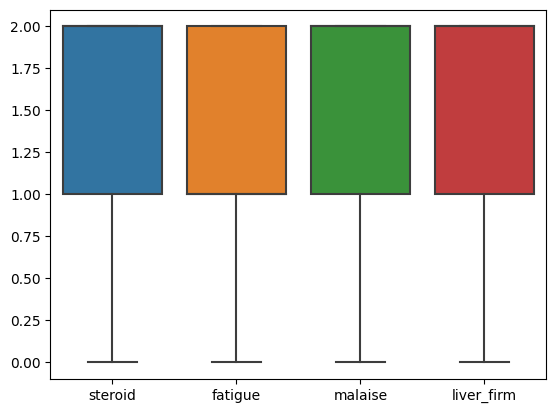

In [28]:
#Using sctterplot to detect outlier
sns.boxplot(df[['steroid', 'fatigue', 'malaise', 'liver_firm']])

<Axes: xlabel='albumin', ylabel='age'>

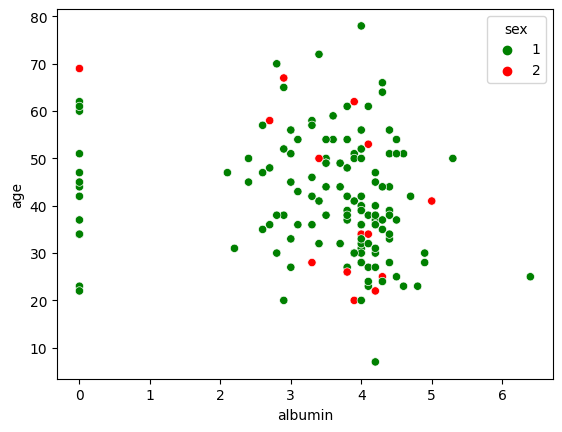

In [29]:
# Multivariate Outlier Detection
sns.scatterplot(x=df['albumin'], y=df['age'], hue=df['sex'], palette=['g', 'r'], data=df)

#### Let's find the outliers, in each column of the data, using IQR.

In [30]:
# To find the 25th percentile and 75th percentile.
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [31]:
# Finding lower and upper bounds for all actual values. All values outside these bounds are outliers
lower = Q1 - 1.5 * IQR
upper = Q3 - 1.5 * IQR
print("Lower boundaries:")
print(lower, "\n")
print("Upper boundaries:")
print(upper)
#luo = (df < lower) | (df > upper)
#luo

Lower boundaries:
class               2.000
age                 5.000
sex                 1.000
steroid            -0.500
antivirals          2.000
fatigue            -0.500
malaise            -0.500
anorexia            2.000
liver_big           2.000
liver_firm         -0.500
spleen_palpable     2.000
spiders            -0.500
ascites             2.000
varices             2.000
bilirubin          -0.500
alk_phosphate     -51.750
sgot              -72.250
albumin             1.325
protime           -97.500
histology          -0.500
dtype: float64 

Upper boundaries:
class               2.000
age                23.000
sex                 1.000
steroid             0.500
antivirals          2.000
fatigue             0.500
malaise             0.500
anorexia            2.000
liver_big           2.000
liver_firm          0.500
spleen_palpable     2.000
spiders             0.500
ascites             2.000
varices             2.000
bilirubin           0.300
alk_phosphate      16.750
sgot       

<Axes: >

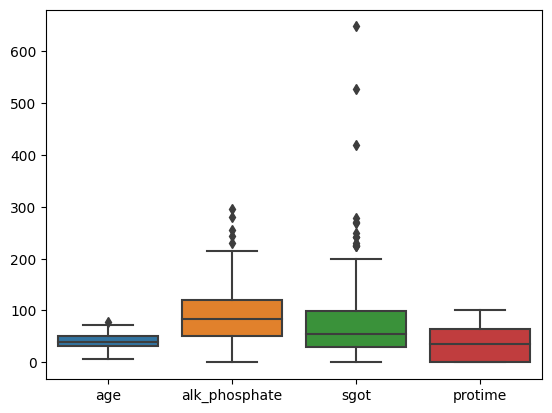

In [32]:
sns.boxplot(df[['age', 'alk_phosphate', 'sgot', 'protime']])

### Observations

+ Outliers detected are within age, alk_phosphate, sgot and protime of our dataset 

+ After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, alk_phosphate, sgot, protime etc) and we would want our model to learn the underlying pattern for such patients.

**_To remove the outlier we can use the code below_**

`df_no_otl = df[~((df < lower) | (df > upper))]`

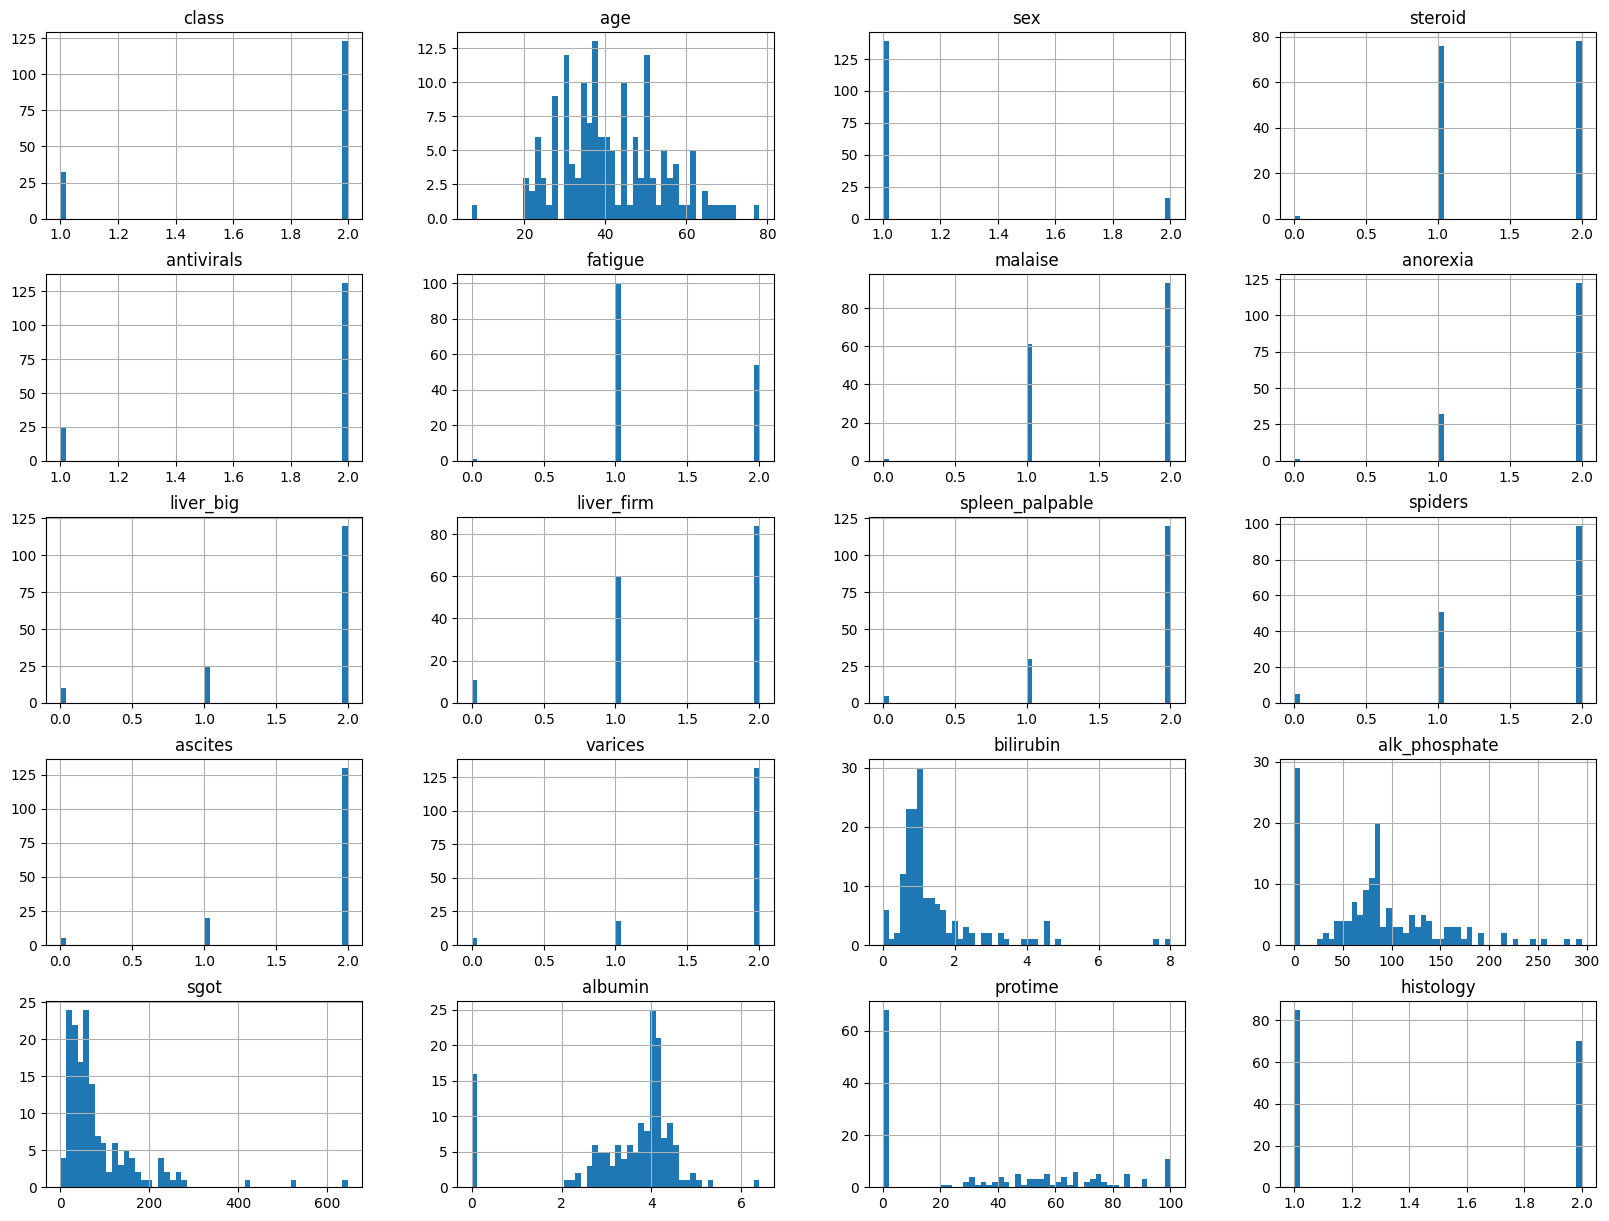

In [33]:
# Let's plot the distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

# Feature Selection
<p>This is also referred to as <strong><i>Feaure Engineering</i></strong>; which is the process of selecting and tranforming relevant variabe using domain knowledge or machine learning from raw data when creating predictive model.</p>

#### Tools for selecting important features that correlate with the target/output

+ **SelectKbest**
> _SelectKbest:_ Help select features with strong relationships with the target
+ **Recursive Feature Elimination**
> _Recursive Feature Elimination:_ Help select features with strong relationships with the target and eliminate others

#### SelectKBest Method of Feature Selection

In [34]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [35]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [36]:
# Features and Target
# Splitting our dataset into xFeatures and yTarget

xFeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
yTarget = df['class']

In [37]:
# Selecting best features using SKb
skb = SelectKBest(score_func=chi2, k=15)
best_features = skb.fit(xFeatures, yTarget)

In [38]:
# Highest score shows the best fureturs
print(f"Score: {best_features.scores_}")

Score: [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [39]:
# Transforing selected features(optional)
best_f_trans = best_features.transform(xFeatures)

In [40]:
best_f_trans

array([[30. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  1. , ...,  3.5,  0. ,  1. ],
       [78. ,  2. ,  1. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  1. , ...,  4.1, 48. ,  2. ],
       [43. ,  2. ,  1. , ...,  3.1, 42. ,  2. ]])

#### Mapping Feature Scores to its respective name

In [41]:
# showing f_score in DataFrame

feature_score = pd.DataFrame(best_features.scores_, columns=['feature_score'])

In [42]:
feature_score

,feature_score
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [43]:
# Feature column name 
feature_column_name = pd.DataFrame(xFeatures.columns, columns=['feature_name'])

# Map Feature score to Feature name
best_feature_df = pd.concat([feature_column_name, feature_score], axis=1)

In [44]:
best_feature_df # The higher the score the better the feature for prediction

,feature_name,feature_score
0,age,28.474819
1,sex,0.389483
2,steroid,0.399513
3,antivirals,0.186342
4,fatigue,2.346432
5,malaise,2.468032
6,anorexia,0.196481
7,liver_big,0.316982
8,liver_firm,0.986710
9,spleen_palpable,0.745352


In [45]:
# Get the top best 12 features
best_feature_df.nlargest(12, 'feature_score')

,feature_name,feature_score
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


## Method 2: Using Recursive Feature Elimination Method of Feature Selection

+ There are possible two RFEs listed below, that can be used for this purpose
    - RFE and RFECV

In [46]:
# model Initalized
classifier = LogisticRegression(random_state=0)
estimator = DecisionTreeClassifier()

In [47]:
#rfe = RFE(classifier, n_features_to_select=8)
#rfcv = RFECV(classifier, cv=8)

rfcv = RFECV(estimator, cv=8)

In [48]:
# Let's Training 
#rfe.fit(xFeatures, yTarget)

selector = rfcv.fit(xFeatures, yTarget)

In [49]:
# Selection
seelcted_features = pd.DataFrame(selector.support_, columns=['Selected Features'])

In [50]:
feature_ranking = pd.DataFrame(selector.ranking_, columns=['Features Ranking'])

In [51]:
show_selected = pd.concat([feature_column_name, seelcted_features, feature_ranking], axis=1)

In [52]:
show_selected 

,feature_name,Selected Features,Features Ranking
0,age,True,1
1,sex,False,7
2,steroid,False,6
3,antivirals,False,5
4,fatigue,False,4
5,malaise,True,1
6,anorexia,False,3
7,liver_big,False,2
8,liver_firm,True,1
9,spleen_palpable,True,1


### Observations
+ From the result, the Features with the lowest ranking or true selection will/should be eliminated

### Using ExtraTreesClassifier Method of Feature Selection

In [53]:
etcf = ExtraTreesClassifier()
etcf.fit(xFeatures, yTarget)

ExtraTreesClassifier()

In [54]:
print(etcf.feature_importances_)

[0.05725779 0.02021473 0.02849354 0.01192803 0.03354899 0.05411398
 0.0309391  0.03508564 0.04883944 0.04241584 0.06714863 0.08467548
 0.05374664 0.10600818 0.07146783 0.04896451 0.07817649 0.06143484
 0.0655403 ]


In [55]:
feature_importance = pd.DataFrame(etcf.feature_importances_, columns=['Feature Importance'])
selected_feature_importance = pd.concat([feature_column_name, feature_importance], axis=1)

In [56]:
selected_feature_importance

,feature_name,Feature Importance
0,age,0.057258
1,sex,0.020215
2,steroid,0.028494
3,antivirals,0.011928
4,fatigue,0.033549
5,malaise,0.054114
6,anorexia,0.030939
7,liver_big,0.035086
8,liver_firm,0.048839
9,spleen_palpable,0.042416


In [57]:
selected_feature_importance.nlargest(12, 'Feature Importance')

,feature_name,Feature Importance
13,bilirubin,0.106008
11,ascites,0.084675
16,albumin,0.078176
14,alk_phosphate,0.071468
10,spiders,0.067149
18,histology,0.065540
17,protime,0.061435
0,age,0.057258
5,malaise,0.054114
12,varices,0.053747


<function matplotlib.pyplot.show(close=None, block=None)>

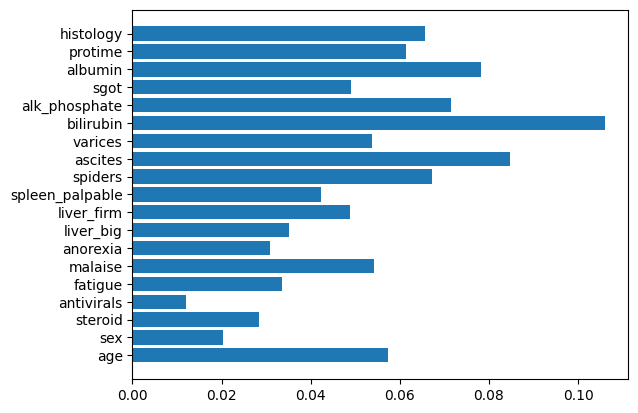

In [58]:
#figsize, ax1 = plt.subplots()
plt.barh(selected_feature_importance['feature_name'], selected_feature_importance['Feature Importance'])
plt.show

<Axes: ylabel='Feature Name'>

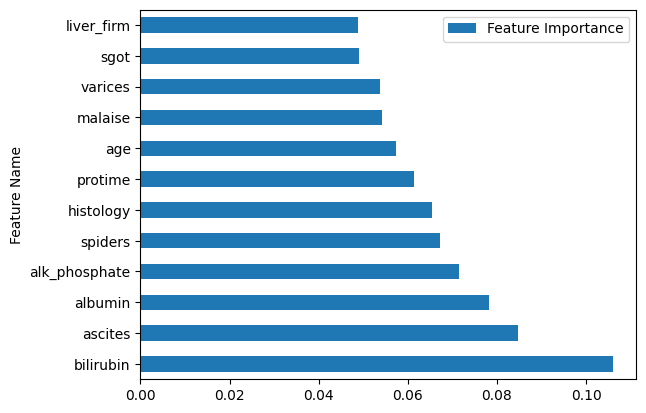

In [59]:
selected_feature_importance.nlargest(12, 'Feature Importance').plot(kind='barh', x='feature_name', ylabel='Feature Name')

In [60]:
selected_feature_importance.feature_name

0                 age
1                 sex
2             steroid
3          antivirals
4             fatigue
5             malaise
6            anorexia
7           liver_big
8          liver_firm
9     spleen_palpable
10            spiders
11            ascites
12            varices
13          bilirubin
14      alk_phosphate
15               sgot
16            albumin
17            protime
18          histology
Name: feature_name, dtype: object

#### Observation
+ The best selectd features for prediction include; **bilirubin, albumin, spider, age, protime, sgot, ascites, alk_phosphate, histology, malaise, varices, liver_firm and fatigue**.

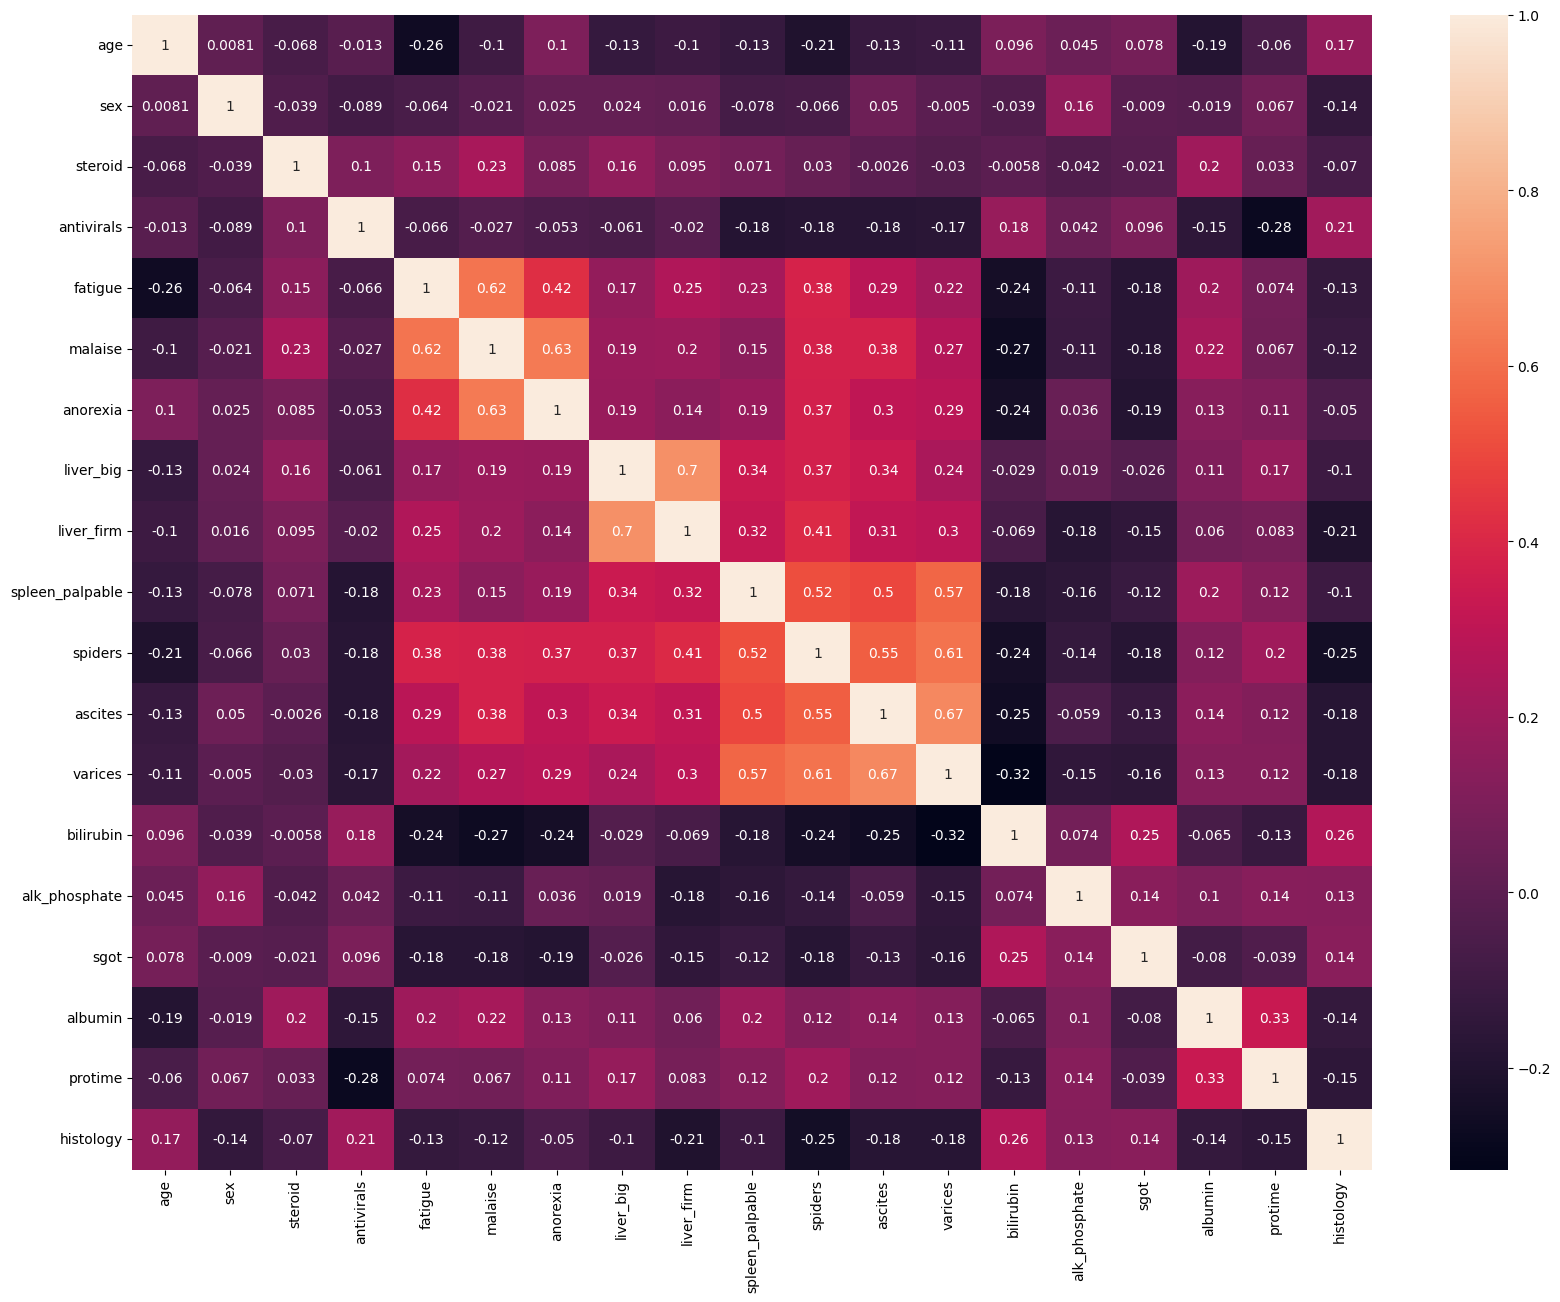

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(xFeatures.corr(), annot=True)
plt.show()

# Build Model

+ working with feature and target
+ Train, Test & Split data
+ Algorithm for model building we can use inlinde:
    - LogisticRegression
    - RandomForest
    - DecisionTreeClassifier
+ Serialize

In [62]:
# Initial Features
xFeatures.columns.tolist()

['age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [63]:
# Selected Featurs
best_feature_df.nlargest(12, 'feature_score')['feature_name'].tolist()

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'malaise',
 'fatigue',
 'ascites',
 'varices']

#### Building model for both xFeatures & Selected Features
+ We compare accuracy of prediction on selected features as against all features

##### Starting with xFeatures

In [64]:
# xFeature
# Split Train Test Data of all features
X_train, X_test, y_train, y_test = train_test_split(xFeatures, yTarget, test_size=0.3, random_state=0 )

In [65]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [66]:
# Model Accuracy
# Method 1
logreg.score(X_test, y_test)

0.7659574468085106

In [67]:
# Method 2
pred = logreg.predict(X_test)

In [68]:
accuracy_score(y_test, pred)

0.7659574468085106

#### Selected Features

In [69]:
# Selected Features (steriod and antivirus been med/control were added to the selected feature )
selected_features = ['age','sex','steroid','antivirals','fatigue','malaise','liver_firm','spiders','ascites','varices','bilirubin','alk_phosphate','sgot','albumin','protime','histology']

In [70]:
X_best_features = xFeatures[selected_features]

In [71]:
# Split Train Test Data
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_best_features, yTarget, test_size=0.3, random_state=0 )

In [72]:
lg = LogisticRegression(random_state=0)
lg.fit(X_train_b,y_train_b)

LogisticRegression(random_state=0)

In [73]:
# Check Accuracy
lg.score(X_test_b,y_test_b)

0.7872340425531915

In [74]:
pred_b = lg.predict(X_test_b)
accuracy_score(y_test_b, pred_b)

0.7872340425531915

#### Observations
+ The selected features perform better than all features

### Making single prediction

In [75]:
X_test_b.iloc[1]

age               50.0
sex                2.0
steroid            1.0
antivirals         2.0
fatigue            1.0
malaise            2.0
liver_firm         1.0
spiders            1.0
ascites            2.0
varices            2.0
bilirubin          0.9
alk_phosphate    230.0
sgot             117.0
albumin            3.4
protime           41.0
histology          2.0
Name: 90, dtype: float64

In [76]:
# res_dic = {'Die':1,'Live':2}
x1 = X_test_b.iloc[1]
lg.predict(np.array(x1).reshape(1,-1)) # Reshape single feature to 2D

array([2], dtype=int64)

#### Observations
+ GIven the single feature, the model predicted that the patient **Live**

## Building Model Using Decision Tree

In [77]:
dcf = DecisionTreeClassifier(random_state=0)
dcf.fit(X_train_b,y_train_b)

DecisionTreeClassifier(random_state=0)

In [78]:
# Model Accuracy Score
dcf.score(X_test_b,y_test_b)

0.7021276595744681

#### Observations
+ It appears DecisionTree model perform less when compare with LR


### Alternative Model with KNN

In [79]:
knn = KNeighborsClassifier(n_neighbors=6)

In [80]:
knn.fit(X_train_b,y_train_b)

KNeighborsClassifier(n_neighbors=6)

In [81]:
knn.score(X_test_b,y_test_b)

0.7659574468085106

#### Observations
+ The first model holds better prediction in all the three algorithms used

### Create Decision Tree Plot


In [82]:
feature_names = X_best_features.columns
target_names = ["Die", "Live"]

In [83]:
# Create A Dot Plot
dot_data = tree.export_graphviz(dcf,out_file=None,feature_names=feature_names,class_names=target_names)

In [84]:
graph = pydotplus.graph_from_dot_data(dot_data)

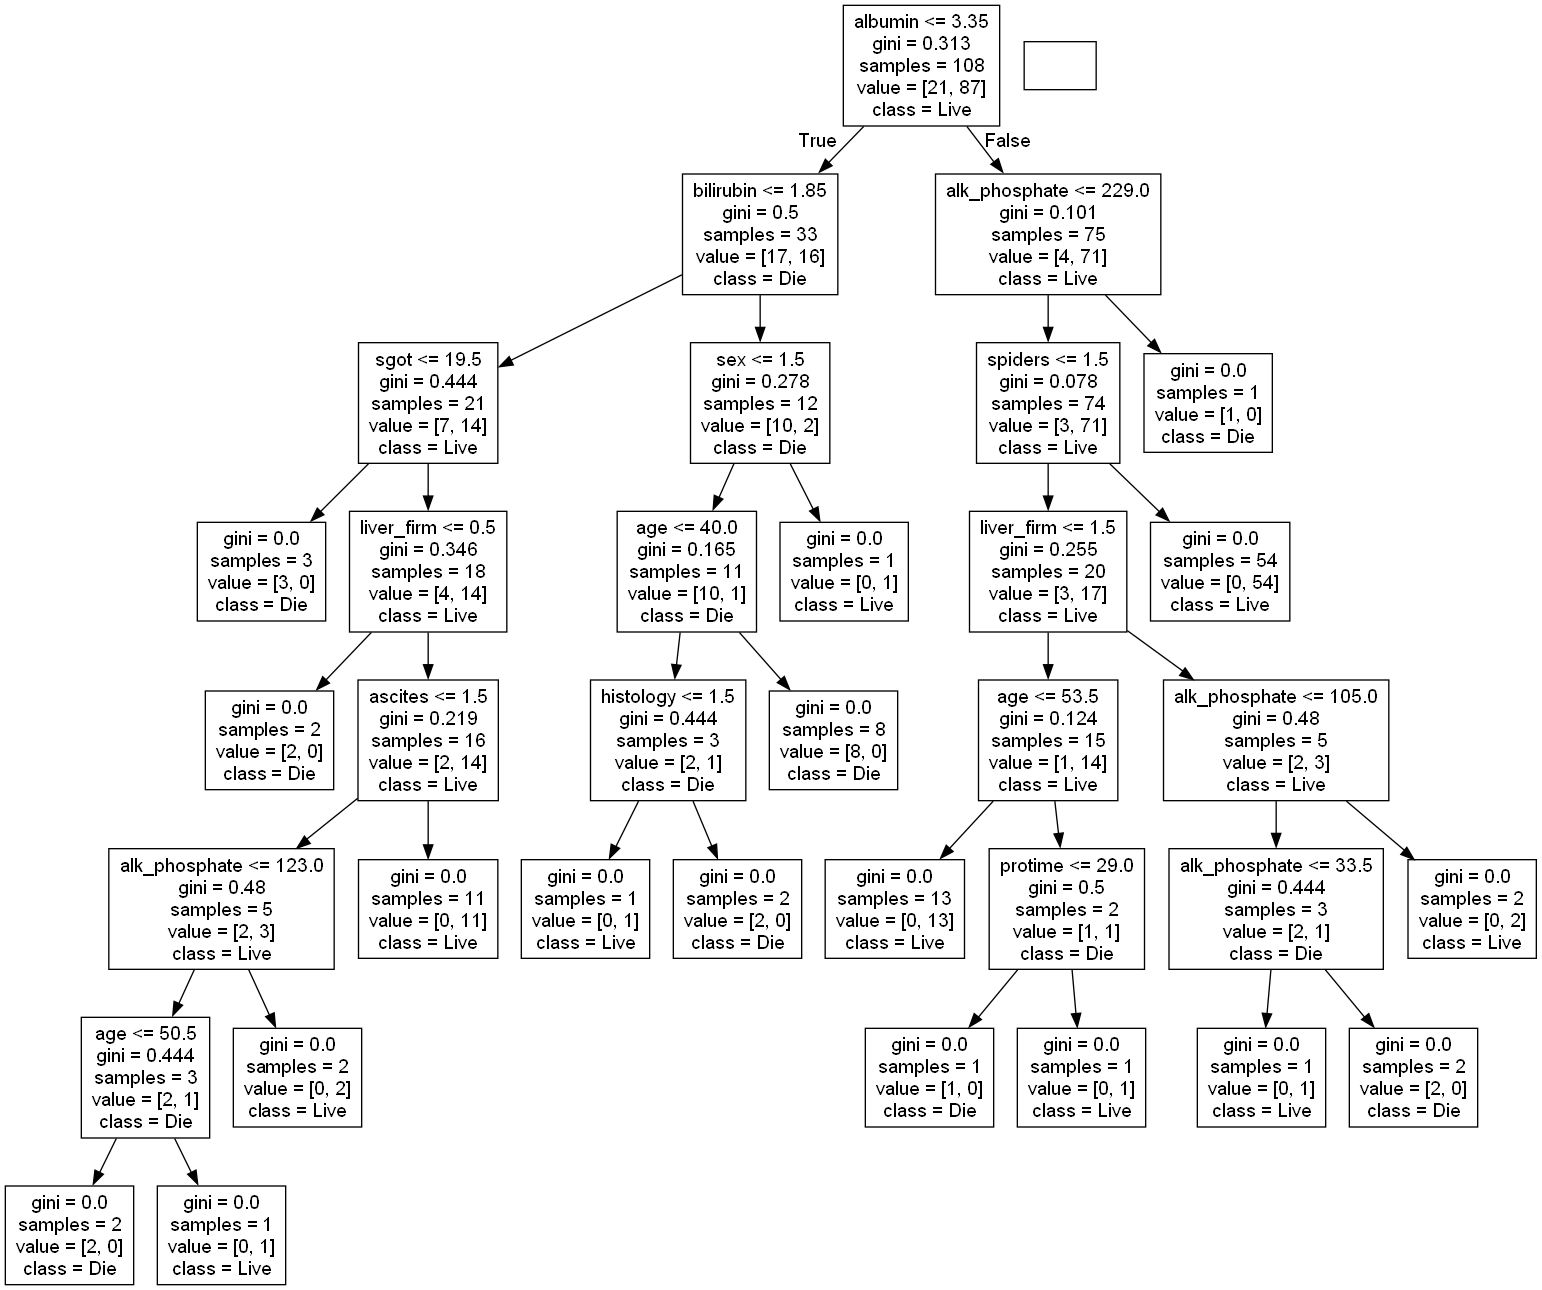

In [85]:
Image(graph.create_png())

In [86]:
# let's save the graph plot
graph.write_png("hep_decision_tree_plot.png")

True

## Evaluation of Model
<p>The following are tools that can be used to imterpret our model</p>

+ Confusion Matrix
+ Classification Report
+ Acuracy Score

In [87]:
pred = lg.predict(X_test_b)

In [88]:
# Evaluate with Accuracy Score
accuracy_score(y_test,pred)

0.7872340425531915

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [89]:
def metrics_score(actual,predict,class_names):
    print(classification_report(actual,predict,target_names=class_names))
    c_m = confusion_matrix(actual, predict)
    #plt.figure(figsize=(8,5))
    sns.heatmap(c_m, annot=True, fmt='.2f', xticklabels=['Die(1)', 'Live(2)'], yticklabels=['Die(1)', 'Live(2)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

              precision    recall  f1-score   support

         Die       0.77      0.48      0.59        21
        Live       0.88      0.97      0.92        87

    accuracy                           0.87       108
   macro avg       0.83      0.72      0.76       108
weighted avg       0.86      0.87      0.86       108



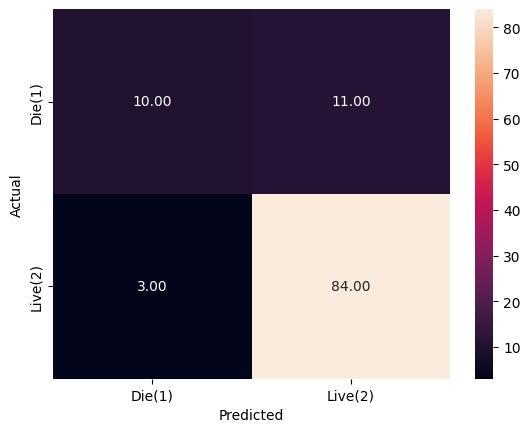

In [90]:
#checking the performance on the training dataset
pred_train = lg.predict(X_train_b)
metrics_score(y_train_b,pred_train,target_names)

              precision    recall  f1-score   support

         Die       0.60      0.27      0.37        11
        Live       0.81      0.94      0.87        36

    accuracy                           0.79        47
   macro avg       0.70      0.61      0.62        47
weighted avg       0.76      0.79      0.76        47



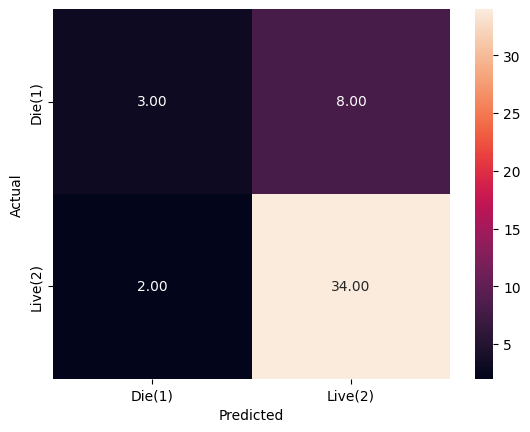

In [91]:
#checking the performance on the test dataset
pred = lg.predict(X_test_b)
metrics_score(y_test_b,pred,target_names)

**Observations:**
- **We are getting an accuracy of around 90% and 80%** on train and test dataset respectively.
- However, **the recall for this model is above 90% for class 2 on train and test dataset.**
- As the recall is high, **this model will perform well** in differentiating out those patients who have a high chance of surviving.

## Interpretation of Model
<p>The following are the packages that can be used to imterpret our model</p>

+ Eli5
+ Lime
+ SHAP
+ Skater

In [92]:
# Methods and Attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

### Create Lime Explainer
+ LimeTabularExplainer for Table Explainer
+ LimeTextExplainer for Text Explainer
+ LimeImaeExplainer for Image Explainer

In [93]:
feature_names

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'liver_firm', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology'],
      dtype='object')

In [94]:
target_names = ['Die(1)', 'Live(2)']

In [95]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_b.values, 
                                                   feature_names=feature_names,
                                                   class_names=target_names,
                                                   discretize_continuous=True)

In [96]:
#Explanation on single patient
#using above sample => x1 = X_test_b.iloc[1] 
lg.predict(np.array(x1).reshape(1,-1))

array([2], dtype=int64)

#### Observations
+ Result shows the above patient live

In [97]:
# let's explain the result
exp = explainer.explain_instance(x1, lg.predict_proba, num_features=16,
                                top_labels=1)

In [98]:
exp.show_in_notebook(show_table=True, show_all=False)

In [99]:
# Explanation as list
exp.as_list()

[('1.00 < histology <= 2.00', -0.21271493306583034),
 ('fatigue <= 1.00', -0.1838451125742887),
 ('sex > 1.00', 0.16426128392314096),
 ('1.00 < malaise <= 2.00', 0.11663327391001664),
 ('spiders <= 1.00', -0.11437937831957828),
 ('sgot > 104.25', 0.0667542428316692),
 ('0.80 < bilirubin <= 1.00', 0.06529238101734541),
 ('alk_phosphate > 111.00', 0.031157689596070615),
 ('steroid <= 1.00', -0.030110012101617154),
 ('3.25 < albumin <= 4.00', 0.0290532174370586),
 ('liver_firm <= 1.00', 0.027845792986434904),
 ('37.00 < protime <= 64.50', 0.021930961575901),
 ('39.50 < age <= 50.00', -0.019429208748743376),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0),
 ('antivirals <= 2.00', 0.0)]

### Explanation Using Eli5

In [100]:
# Show how each feature contributes
eli5.show_weights(lg,top=10)

In [101]:
feature_names = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'liver_firm', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']

In [102]:
# Show how each feature contributes more details
eli5.show_weights(lg,feature_names=feature_names,
                  target_names=target_names, top=10)

In [103]:
# Predict and Explain single sample
eli5.show_prediction(lg,x1,feature_names=feature_names,
                  target_names=target_names, top=10)

## Saving Model
**The methods that can used to saving model are:**
+ Serialization
+ Pickle
+ Joblib
+ Numpy / Json /Ray

In [104]:
model_file = open("logisgic_reg_hep_model.pkl","wb")
joblib.dump(lg,model_file)
model_file.close()

In [105]:
model_file_dcf = open("decision_tree_hep_model.pkl","wb")
joblib.dump(dcf,model_file_dcf)
model_file_dcf.close()

In [106]:
model_file_knn = open("knn_hep_model.pkl","wb")
joblib.dump(knn,model_file_knn)
model_file_knn.close()